## About the dataset
The dataset includes all valid felony, misdemeanor, and violation crimes reported to the New York City Police Department (NYPD) from 2006 to the end of 2019. 

The [original dataset](https://data.cityofnewyork.us/d/qgea-i56i?category=Public-Safety&view_name=NYPD-Complaint-Data-Historic) can be found on the [NYC Open Data](http://https://opendata.cityofnewyork.us/) website.



## Import libraries and data

In [81]:
import pandas as pd 

import warnings
warnings.filterwarnings('ignore')

In [82]:
# importing data as pandas dataframe
df = pd.read_csv("NYPD_Complaint_Data_Historic.csv")

## Data pre-processing

Firstly, we check the amount of rows in the dataset to understand the size we are working with.

In [83]:
#The dataset size
print("Observations: ", df.shape[0])

#The number of variables
print("Variables: ", df.shape[1])

Observations:  7825499
Variables:  35


- The `head()` function is to check if the data is successfully obtained.

In [84]:
# show first 5 entries
df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,394506329,12/31/2019,17:30:00,NaN,NaN,32.0,12/31/2019,118,DANGEROUS WEAPONS,793.0,...,NaN,NaN,40.820927,-73.943324,"(40.82092679700002, -73.94332421899996)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,E
1,968873685,12/29/2019,16:31:00,12/29/2019,16:54:00,47.0,12/29/2019,113,FORGERY,729.0,...,NaN,NaN,40.885701,-73.861640,"(40.885701406000074, -73.86164032499995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
2,509837549,12/15/2019,18:45:00,NaN,NaN,109.0,12/29/2019,578,HARRASSMENT 2,638.0,...,M,NaN,40.742281,-73.819824,"(40.74228115600005, -73.81982408)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE HISPANIC,F
3,352454313,12/28/2019,01:00:00,NaN,NaN,47.0,12/28/2019,126,MISCELLANEOUS PENAL LAW,117.0,...,M,NaN,40.875311,-73.847545,"(40.87531145100007, -73.84754521099995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
4,248803469,09/05/2008,21:41:00,NaN,NaN,NaN,09/05/2008,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,NaN,NaN,40.698827,-73.938819,"(40.698827283, -73.938819047)",NaN,NaN,25-44,BLACK,M


Then, we display every column to understand the variables and their types.

In [85]:
#the name of the variables and their types
df.dtypes

CMPLNT_NUM             int64
CMPLNT_FR_DT          object
CMPLNT_FR_TM          object
CMPLNT_TO_DT          object
CMPLNT_TO_TM          object
ADDR_PCT_CD          float64
RPT_DT                object
KY_CD                  int64
OFNS_DESC             object
PD_CD                float64
PD_DESC               object
CRM_ATPT_CPTD_CD      object
LAW_CAT_CD            object
BORO_NM               object
LOC_OF_OCCUR_DESC     object
PREM_TYP_DESC         object
JURIS_DESC            object
JURISDICTION_CODE    float64
PARKS_NM              object
HADEVELOPT            object
HOUSING_PSA           object
X_COORD_CD           float64
Y_COORD_CD           float64
SUSP_AGE_GROUP        object
SUSP_RACE             object
SUSP_SEX              object
TRANSIT_DISTRICT     float64
Latitude             float64
Longitude            float64
Lat_Lon               object
PATROL_BORO           object
STATION_NAME          object
VIC_AGE_GROUP         object
VIC_RACE              object
VIC_SEX       

### Variables dictionary 

> **CMPLNT_NUM** - Randomly generated persistent ID for each complaint
> 
> **ADDR_PCT_CD** - The precinct in which the incident occurred
> 
> **BORO** - The name of the borough in which the incident occurred
> 
> **CMPLNT_FR_DT** - Exact date of occurrence for the reported event (or starting date of occurrence, if CMPLNT_TO_DT exists)
> 
> **CMPLNT_FR_TM** - Exact time of occurrence for the reported event (or starting time of occurrence, if CMPLNT_TO_TM exists)
> 
> **CMPLNT_TO_DT** - Ending date of occurrence for the reported event, if exact time of occurrence is unknown
> 
> **CMPLNT_TO_TM** - Ending time of occurrence for the reported event, if exact time of occurrence is unknown
> 
> **CRM_ATPT_CPTD_CD** - Indicator of whether crime was successfully completed or attempted, but failed or was interrupted prematurely
> 
> **HADEVELOPT** - Name of NYCHA housing development of occurrence, if applicable
> 
> **HOUSING_PSA** - Development Level Code
> 
> **JURISDICTION_CODE** - Jurisdiction responsible for incident. Either internal, like Police(0), Transit(1), and Housing(2); or external(3), like Correction, Port Authority, etc.
> 
> **JURIS_DESC** - Description of the jurisdiction code
> 
> **KY_CD** - Three digit offense classification code
> 
> **LAW_CAT_CD** - Level of offense: felony, misdemeanor, violation
> 
> **LOC_OF_OCCUR_DESC** - Specific location of occurrence in or around the premises; inside, opposite of, front of, rear of
> 
> **OFNS_DESC** - Description of offense corresponding with key code
> 
> **PARKS_NM** - Name of NYC park, playground or greenspace of occurrence, if applicable (state parks are not included)
> 
> **PATROL_BORO** - The name of the patrol borough in which the incident occurred
> 
> **PD_CD** - Three digit internal classification code (more granular than Key Code)
> 
> **PD_DESC** - Description of internal classification corresponding with PD code (more granular than Offense Description)
> 
> **PREM_TYP_DESC** - Specific description of premises; grocery store, residence, street, etc.
> 
> **RPT_DT** - Date event was reported to police
> 
> **STATION_NAME** - Transit station name
> 
> **SUSP_AGE_GROUP** - Suspect’s Age Group
> 
> **SUSP_RACE** - Suspect’s Race Description
> 
> **SUSP_SEX** - Suspect’s Sex Description
> 
> **TRANSIT_DISTRICT** - Transit district in which the offense occurred.
> 
> **VIC_AGE_GROUP** - Victim’s Age Group
> 
> **VIC_RACE** - Victim’s Race Description
> 
> **VIC_SEX** - Victim’s Sex Description (D=Business/Organization, E=PSNY/People of the State of New York, F=Female, M=Male)
> 
> **X_COORD_CD** - X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)
> 
> **Y_COORD_CD** - Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)
> 
> **Latitude** - Midblock Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)
> 
> **Longitude** - Midblock Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)

The dataset contains over 6 million crime reports from 2006 to 2019, with a total of 35 variables each.

After looking at the head of the dataset we were already able to notice some NaN values, therefore we need to examine the missing values further before continuing with the analysis. 

- The `isna()` function will show us the percentage of non-existent values for each variable.

In [86]:
#See the percentege of missing values in each variable
(df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)

PARKS_NM             99.605712
STATION_NAME         97.795987
TRANSIT_DISTRICT     97.795987
HADEVELOPT           95.548028
HOUSING_PSA          92.341792
SUSP_AGE_GROUP       62.403292
SUSP_SEX             46.618650
SUSP_RACE            44.915065
CMPLNT_TO_DT         22.289876
CMPLNT_TO_TM         22.228346
VIC_AGE_GROUP        20.937259
LOC_OF_OCCUR_DESC    20.676803
PREM_TYP_DESC         0.536899
OFNS_DESC             0.240649
Y_COORD_CD            0.221571
X_COORD_CD            0.221571
Lat_Lon               0.221571
Latitude              0.221571
Longitude             0.221571
BORO_NM               0.159479
PATROL_BORO           0.092237
PD_DESC               0.086397
PD_CD                 0.086397
JURISDICTION_CODE     0.086397
ADDR_PCT_CD           0.027679
CMPLNT_FR_DT          0.008370
VIC_RACE              0.004984
VIC_SEX               0.003936
CRM_ATPT_CPTD_CD      0.002147
CMPLNT_FR_TM          0.000613
JURIS_DESC            0.000000
LAW_CAT_CD            0.000000
KY_CD   

### Data Cleaning

#### Dealing with NaN data

Since some of the columns are pretty important for the analysis, I dropped entire rows which miss any crucial value. For that, I used the `dropNA()` function in Pandas.

The columns I didn't want to drop entire rows, I opted to fill them with the 'UNKNOWN' value (These include variables that contain information about the victims of the crime, such as their age group, race, and gender). I used the `fillNA()` function for that.

It is worth mention that some specific variables have a lot of NaN values, and they don't necessarily have any use in this analysis (like PARKS_NM means the park or public place nearby where crime happened, and columns with information about the suspect are also not going to be important, considering they have a lot of missing data) so I would drop those columns entirely with the `drop()` function.

In [87]:
#dropping rows with NaN values
df.dropna(subset=['Y_COORD_CD','X_COORD_CD','Latitude','Longitude','CRM_ATPT_CPTD_CD','CMPLNT_FR_TM','Lat_Lon','CMPLNT_FR_DT','BORO_NM','OFNS_DESC'], inplace=True)

#dropping columns that are not significant for future data exploration
df.drop(['PARKS_NM','CMPLNT_NUM','STATION_NAME','TRANSIT_DISTRICT','HADEVELOPT','HOUSING_PSA'],axis='columns', inplace=True)

df.drop(['PREM_TYP_DESC','SUSP_AGE_GROUP','SUSP_RACE','JURISDICTION_CODE'], axis='columns', inplace=True)

df.drop(['ADDR_PCT_CD','PD_CD','PD_DESC','PATROL_BORO','CMPLNT_TO_DT','CMPLNT_TO_TM'], axis='columns', inplace=True)

#replacing all NaN values in 'LOC_OF_OCCUR_DESC' with UNKNOWN
df.fillna({'LOC_OF_OCCUR_DESC':'UNKNOWN'}, inplace=True)

#replacing all NaN values in 'VIC_RACE' with UNKNOWN
df.fillna({'VIC_RACE':'UNKNOWN'}, inplace=True)

#replacing all NaN values in 'VIC_AGE_GROUP' with UNKNOWN
df.fillna({'VIC_AGE_GROUP':'UNKNOWN'}, inplace=True)

#replacing all NaN values in 'VIC_SEX' with UNKNOWN
df.fillna({'VIC_SEX':'UNKNOWN'}, inplace=True)


print("Remaining Observations: ", df.shape[0])
print("Remaining Variables: ", df.shape[1])

#examing the changes
df.head(5)

Remaining Observations:  7776644
Remaining Variables:  19


,CMPLNT_FR_DT,CMPLNT_FR_TM,RPT_DT,KY_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,JURIS_DESC,X_COORD_CD,Y_COORD_CD,SUSP_SEX,Latitude,Longitude,Lat_Lon,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,12/31/2019,17:30:00,12/31/2019,118,DANGEROUS WEAPONS,COMPLETED,FELONY,MANHATTAN,UNKNOWN,N.Y. POLICE DEPT,999937.0,238365.0,NaN,40.820927,-73.943324,"(40.82092679700002, -73.94332421899996)",UNKNOWN,UNKNOWN,E
1,12/29/2019,16:31:00,12/29/2019,113,FORGERY,COMPLETED,FELONY,BRONX,UNKNOWN,N.Y. POLICE DEPT,1022508.0,261990.0,NaN,40.885701,-73.861640,"(40.885701406000074, -73.86164032499995)",UNKNOWN,UNKNOWN,E
2,12/15/2019,18:45:00,12/29/2019,578,HARRASSMENT 2,COMPLETED,VIOLATION,QUEENS,FRONT OF,N.Y. POLICE DEPT,1034178.0,209758.0,M,40.742281,-73.819824,"(40.74228115600005, -73.81982408)",25-44,WHITE HISPANIC,F
3,12/28/2019,01:00:00,12/28/2019,126,MISCELLANEOUS PENAL LAW,COMPLETED,FELONY,BRONX,REAR OF,N.Y. POLICE DEPT,1026412.0,258211.0,M,40.875311,-73.847545,"(40.87531145100007, -73.84754521099995)",UNKNOWN,UNKNOWN,E
5,12/27/2019,22:00:00,12/27/2019,107,BURGLARY,ATTEMPTED,FELONY,MANHATTAN,FRONT OF,N.Y. POLICE DEPT,989665.0,201866.0,NaN,40.720759,-73.980466,"(40.72075882100006, -73.98046642299995)",UNKNOWN,UNKNOWN,M


 #### Preprocessing Text about Crime Type
 
 - The `unique()` function can extract a list of distinct values in a dataset, it returns the sorted unique elements of an array.
 
After taking a good look at this data and removing NaN data, I realized that crime type data is really confusing. By extracting the unique values in the OFNS_DESC column (description of offense), I can see which descriptions are less intuitive and rename those values to make them more understandable.

In [88]:
df.OFNS_DESC.unique()

array(['DANGEROUS WEAPONS', 'FORGERY', 'HARRASSMENT 2',
       'MISCELLANEOUS PENAL LAW', 'BURGLARY', 'DANGEROUS DRUGS',
       'PETIT LARCENY', 'OFF. AGNST PUB ORD SENSBLTY &', 'GRAND LARCENY',
       'FELONY ASSAULT', 'ASSAULT 3 & RELATED OFFENSES', 'ARSON', 'RAPE',
       'SEX CRIMES', 'GRAND LARCENY OF MOTOR VEHICLE', 'ROBBERY',
       'CRIMINAL MISCHIEF & RELATED OF', 'THEFT-FRAUD',
       'VEHICLE AND TRAFFIC LAWS', 'CRIMINAL TRESPASS',
       'OFFENSES INVOLVING FRAUD', 'FRAUDS',
       'OFFENSES AGAINST PUBLIC ADMINI', 'OFFENSES AGAINST THE PERSON',
       'ADMINISTRATIVE CODE', 'INTOXICATED & IMPAIRED DRIVING',
       'ESCAPE 3', 'NYS LAWS-UNCLASSIFIED FELONY',
       'POSSESSION OF STOLEN PROPERTY', 'THEFT OF SERVICES',
       'KIDNAPPING & RELATED OFFENSES', 'OTHER OFFENSES RELATED TO THEF',
       'UNAUTHORIZED USE OF A VEHICLE', "BURGLAR'S TOOLS",
       'ENDAN WELFARE INCOMP', 'FRAUDULENT ACCOSTING',
       'AGRICULTURE & MRKTS LAW-UNCLASSIFIED',
       'OTHER STATE LAWS 

- The `replace()` method returns a copy of all occurrences of a substring after being replaced with another substring. With that, I was able to copy the dataset into a new dataset called 'df_clean' and rename some of the crime descriptions (e.g. 'HARRASSMENT 2' to 'HARASSMENT', 'OFF. AGNST PUB ORD SENSBLTY &' to 'OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION').

In [96]:
df.replace({'HARRASSMENT 2': 'HARASSMENT', 'ESCAPE 3': 'ESCAPE','ASSAULT 3 & RELATED OFFENSES': 
'ASSAULT & RELATED OFFENSES','CRIMINAL MISCHIEF & RELATED OF': 'CRIMINAL MISCHIEF',
'OFF. AGNST PUB ORD SENSBLTY &':'OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION',
'OTHER STATE LAWS (NON PENAL LA':'OTHER STATE LAWS (NON PENAL LAW)','ENDAN WELFARE INCOMP': 
'ENDANGERING WELFARE OF INCOMPETENT','AGRICULTURE & MRKTS LAW-UNCLASSIFIED': 
'AGRICULTURE & MARKETS LAW','DISRUPTION OF A RELIGIOUS SERV': 'DISRUPTION OF A RELIGIOUS SERVICE',
'LOITERING/GAMBLING (CARDS, DIC': 'GAMBLING','OFFENSES AGAINST MARRIAGE UNCL': 
'OFFENSES AGAINST MARRIAGE','HOMICIDE-NEGLIGENT,UNCLASSIFIE': 'HOMICIDE-NEGLIGENT','E': 'UNKNOWN',
'D': 'BUSINESS/ORGANIZATION','F': 'FEMALE','M': 'MALE'},inplace=True)

In [92]:
# Checking if data is successfully modified.
df['VIC_SEX'].unique()

array(['UNKNOWN', 'FEMALE', 'MALE', 'BUSINESS/ORGANIZATION'], dtype=object)

## Exploratory Analysis
### 1. Types of Crimes

After cleaning the data, I want to know how many types of crimes are there in New York City.

- Use `value_counts` in Pandas.

The `value_counts` method helps count the number of appearances of different types of crimes and sort them in order. Below, we have the 10 top crimes reported in the dataset.

In [104]:
a = []
a=(df.OFNS_DESC.unique())
u={}
for i in a:
    u.update({i:df.loc[df['OFNS_DESC']==i].shape[0]})
    
print('Sorted key-value pairs of OFNS_DESC in descending order : ')    
{k: v for k, v in sorted(u.items(), key=lambda item: item[1],reverse=True)}

Sorted key-value pairs of OFNS_DESC in descending order : 


{'PETIT LARCENY': 1327051,
 'HARASSMENT': 1017337,
 'ASSAULT & RELATED OFFENSES': 820351,
 'CRIMINAL MISCHIEF': 787400,
 'GRAND LARCENY': 677919,
 'DANGEROUS DRUGS': 433456,
 'OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION': 399154,
 'FELONY ASSAULT': 308136,
 'ROBBERY': 279488,
 'BURGLARY': 266154,
 'MISCELLANEOUS PENAL LAW': 199916,
 'DANGEROUS WEAPONS': 166432,
 'GRAND LARCENY OF MOTOR VEHICLE': 143499,
 'OFFENSES AGAINST PUBLIC ADMINI': 142969,
 'VEHICLE AND TRAFFIC LAWS': 99887,
 'INTOXICATED & IMPAIRED DRIVING': 98711,
 'SEX CRIMES': 94672,
 'CRIMINAL TRESPASS': 83789,
 'THEFT-FRAUD': 80259,
 'FORGERY': 76938,
 'FRAUDS': 46991,
 'POSSESSION OF STOLEN PROPERTY': 38398,
 'OFFENSES INVOLVING FRAUD': 25571,
 'UNAUTHORIZED USE OF A VEHICLE': 23244,
 'RAPE': 23063,
 'OFFENSES AGAINST THE PERSON': 19166,
 'ARSON': 18228,
 'ADMINISTRATIVE CODE': 17016,
 'OTHER OFFENSES RELATED TO THEF': 16834,
 'NYS LAWS-UNCLASSIFIED FELONY': 7260,
 'OTHER STATE LAWS (NON PENAL LAW)': 7128,
 'THEFT OF SERV

In [105]:
# Alternate method to find types of crimes (top 5)
df['OFNS_DESC'].value_counts().iloc[:5]

PETIT LARCENY                 1327051
HARASSMENT                    1017337
ASSAULT & RELATED OFFENSES     820351
CRIMINAL MISCHIEF              787400
GRAND LARCENY                  677919
Name: OFNS_DESC, dtype: int64

Here, we can see the crime incident that has happened the most frequently in New York City is “Petit Larceny”, a form of larceny in which the value of the property taken is generally less than $50.

Then, I plotted the result for better visualization.

<AxesSubplot:title={'center':'Types of Crimes'}>

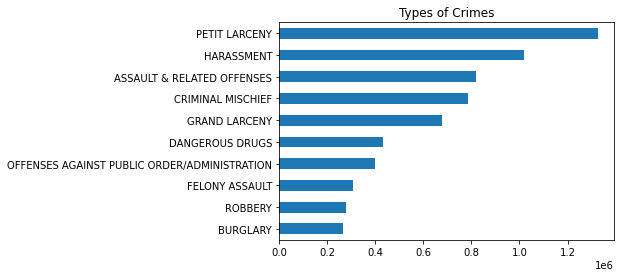

In [107]:
df.OFNS_DESC.value_counts().iloc[:10].sort_values().plot(kind="barh", title = "Types of Crimes")

There are three levels of crime in New York State: Violation, Misdemeanor and Felony.

From the graph below, I can tell that Misdemeanor, an offense of which a sentence in excess of 15 days but not greater than one year may be imposed, is the most popular level of crime. The second popular one is Felony, the most serious of offenses, and the third one is Violation, a lesser offense for which a sentence only be no more than 15 days.

array([<AxesSubplot:ylabel='LAW_CAT_CD'>], dtype=object)

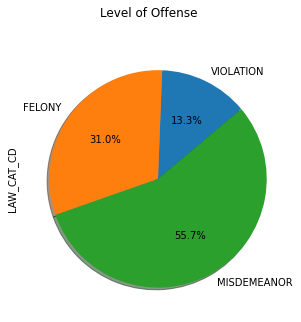

In [109]:
df['LAW_CAT_CD'].value_counts().sort_values().plot(kind='pie', subplots=True, shadow = True,startangle=40,
figsize=(10,5), autopct='%1.1f%%', title = 'Level of Offense')

### 2. Distribution of crimes over the years, months and days

I also want to know about the trend of crime incidents that have been taking place in NYC.

The first graph shows the crime events by year, then by month, and, at last, the crime distribution in a day.

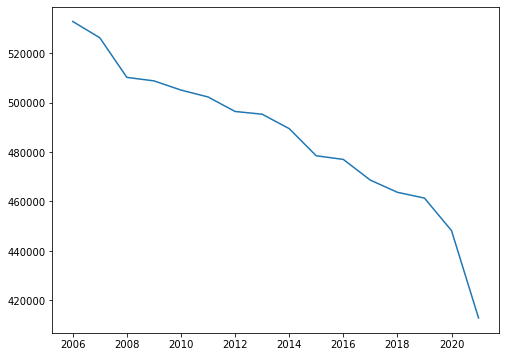

In [155]:
import matplotlib.pyplot as plt
x_axis = [x+1  for x in range(2005,2021) ]
df['year'] = df['RPT_DT'].str.findall(r'(\d{4})').apply(lambda x: x[0])
y_axis = df['year'].value_counts()
plt.figure(figsize=(8,6))
plt.plot(x_axis,y_axis)

Overall, by looking at the number of offenses recorded by the NYC police, it's possible to see that crime levels have been decreasing consistently since 2006.

<AxesSubplot:title={'center':'Total Crime Events by Month'}, xlabel='month'>

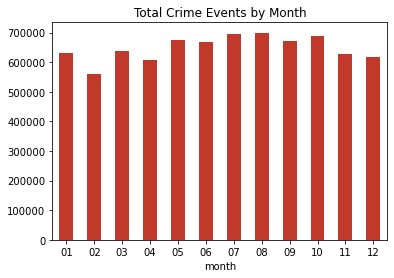

In [154]:
#reports by month
df['month'] = df['RPT_DT'].str.findall('(\d{2})').apply(lambda x: x[0])
df.groupby('month').size().plot(kind = 'bar', title ='Total Crime Events by Month', color = '#C0392B',rot=0)

#descending orde
#df['month'].value_counts().plot(kind="barh", xlabel = "months", ylabel = "reports", rot=0)

Crimes happened the most during July, August, and October, whereas February, November, and December appear to be safer.

It should be noted that February has only 28 days, so as result it has 45 days less than the other months over the period of 16 years .

From that information, it might be possible to assume a positive correlation between temperature and crime. 

<AxesSubplot:title={'center':'Total Crime Events by Day'}, xlabel='hours'>

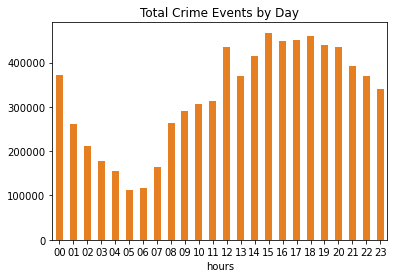

In [116]:
#reports by hour
df['time'] = df['CMPLNT_FR_TM'].str.findall('(\d{2})').apply(lambda x: x[0])
df.groupby('time').size().plot(kind = 'bar', title ='Total Crime Events by Day', color = '#E67E22', xlabel = 'hours',rot=0)
#descending order
#df['time'].value_counts().plot(kind="bar", xlabel = "hours", ylabel = "reports", rot=0)

We can tell the safest time of the day when a crime is the least possible to happen is 5 am, but it's more likely to happen between 12 pm and 6 pm.

### 3. Distribution of Crime in each borough

According to this visualization, Brooklyn has the overall highest number of crime events, with over 2 million reports.

<AxesSubplot:title={'center':'Total of Crime Events by Borough'}>

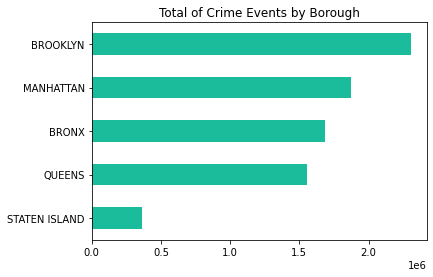

In [140]:
df['BORO_NM'].value_counts().sort_values().plot(kind="barh", color = '#1ABC9C', title = 'Total of Crime Events by Borough')

### 4. Analyzing a Specific Crime

Now specifically analyzing sex related crimes in NYC. For that, I put the part of the dataframe that contains the crime description 'sex crimes' and 'rape' into another dataframe and called it “sex_crimes.”

In [141]:
sex_crimes = df[df.OFNS_DESC.str.contains('SEX CRIMES|RAPE')]
sex_crimes.head()

,CMPLNT_FR_DT,CMPLNT_FR_TM,RPT_DT,KY_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,JURIS_DESC,...,SUSP_SEX,Latitude,Longitude,Lat_Lon,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,year,month,time
20,12/19/2019,02:50:00,12/19/2019,104,RAPE,COMPLETED,FELONY,BRONX,INSIDE,N.Y. POLICE DEPT,...,MALE,40.822570,-73.911307,"(40.82256991600008, -73.91130716899994)",<18,BLACK HISPANIC,FEMALE,2019,12,02
23,12/06/2019,11:30:00,12/19/2019,233,SEX CRIMES,COMPLETED,MISDEMEANOR,MANHATTAN,INSIDE,N.Y. POLICE DEPT,...,MALE,40.742699,-73.998655,"(40.74269929900004, -73.99865537999993)",25-44,UNKNOWN,FEMALE,2019,12,11
32,12/15/2019,09:30:00,12/15/2019,116,SEX CRIMES,COMPLETED,FELONY,BRONX,INSIDE,N.Y. POLICE DEPT,...,MALE,40.837324,-73.919831,"(40.83732351100008, -73.91983075699994)",<18,BLACK,FEMALE,2019,12,09
34,12/05/2019,22:00:00,12/15/2019,233,SEX CRIMES,COMPLETED,MISDEMEANOR,MANHATTAN,UNKNOWN,N.Y. POLICE DEPT,...,MALE,40.828851,-73.943834,"(40.82885104500008, -73.94383419099995)",25-44,WHITE,FEMALE,2019,12,22
38,11/15/2017,20:00:00,12/13/2019,104,RAPE,COMPLETED,FELONY,QUEENS,INSIDE,N.Y. POLICE DEPT,...,MALE,40.729939,-73.810433,"(40.729939364000074, -73.81043314199997)",18-24,WHITE,FEMALE,2019,12,20


In [142]:
sex_crimes.shape

(117768, 22)

#### Analyzing Time

We may be interested in the distribution of values across the years, so I'm going to group the data by year and plot the results.

In [145]:
x_axis

[2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

7360.5


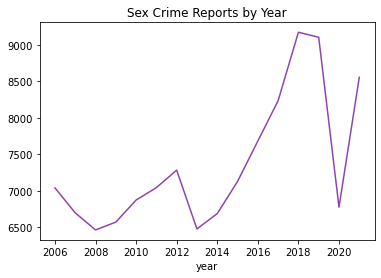

In [149]:
#plot graph
sex_crimes.groupby('year').size().plot(kind = 'line', color = '#8E44AD', title = 'Sex Crime Reports by Year')

#average sex crimes per year
mean = sex_crimes['year'].value_counts().mean()
print(round(mean,2))


### The most probable reason for the rapid spike after 2013 is due to Bill De Blasio's policy on reducing Prosecution for the use of Marijuana possession . And there is rapid decrease from 2020 thanks to Covid-19.

**"Research in the area of sexual assault and the role that alcohol and other drugs play is robust, involving many disciplines and methodologies. The literature has discussed alcohol and drug use in sexual assault and rape asThe Role of Marijuana in Sexual Assault primarily 1) substance-facilitated or 2) substance-incapacitated"** ~(Kilpatrick, et al. 2007). 


- On average, there are 7443 victims of rape and sexual assault each year in New York City.

Let’s also look at how the number of the reports changes within a day.

<AxesSubplot:title={'center':'Sex Crime Reports by Hour'}, xlabel='time'>

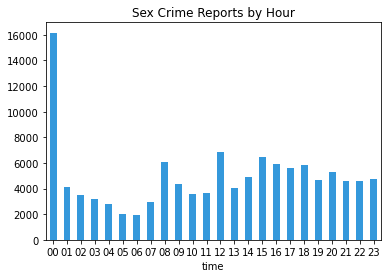

In [150]:
#plot graph
sex_crimes.groupby('time').size().plot(kind = 'bar', color = '#3498DB', rot=0, title = 'Sex Crime Reports by Hour')

Here, we can tell the safest time of the day when a sex crime is the least possible to happen in NYC is 6 am. However, people need to be more careful between midnight and 1 am.

#### Analyzing the victims

Sexual violence affects millions of people. The impact of sexual assault, domestic violence, dating violence or stalking can be life altering for survivors and their families. Therefore, I decided to make a brief analysis of the sex crime victims in New York.

FEMALE                   83.224645
MALE                     14.875858
UNKNOWN                   1.789960
BUSINESS/ORGANIZATION     0.109537
Name: VIC_SEX, dtype: float64


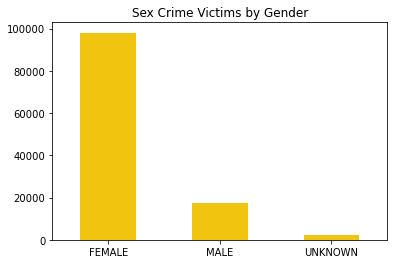

In [151]:
#plot graph
sex_crimes['VIC_SEX'].value_counts().iloc[:3].plot(kind="bar",  color = '#F1C40F', title = 'Sex Crime Victims by Gender', rot=0)

#victims by gender percentage
vic_sex_per = sex_crimes['VIC_SEX'].value_counts() / sex_crimes['VIC_SEX'].shape[0] *100
print(vic_sex_per)

<18      48.015590
25-44    23.234665
18-24    16.386455
45-64     4.997113
65+       0.594389
Name: VIC_AGE_GROUP, dtype: float64


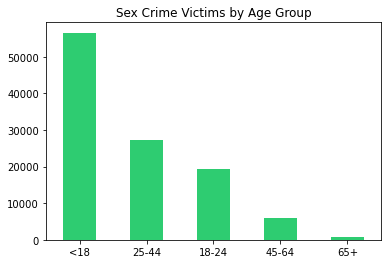

In [152]:
#plot graph
sex_crimes['VIC_AGE_GROUP'].value_counts().iloc[[0,1,2,4,5]].plot(kind="bar", color = '#2ECC71', title = 'Sex Crime Victims by Age Group', rot=0)

#victims by age percentage
vic_age_per = sex_crimes['VIC_AGE_GROUP'].value_counts().iloc[[0,1,2,4,5]] / sex_crimes['VIC_AGE_GROUP'].shape[0] *100
print(vic_age_per)

BLACK                             32.663372
WHITE HISPANIC                    28.658040
WHITE                             16.543543
UNKNOWN                           10.095272
ASIAN / PACIFIC ISLANDER           6.146831
BLACK HISPANIC                     5.621221
AMERICAN INDIAN/ALASKAN NATIVE     0.269173
Name: VIC_RACE, dtype: float64


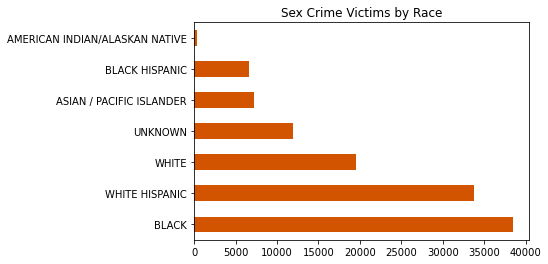

In [153]:
#plot graph
sex_crimes['VIC_RACE'].value_counts().iloc[:7].plot(kind="barh", color = '#D35400', title = 'Sex Crime Victims by Race')

#victims by race percentage
vic_race_per = sex_crimes['VIC_RACE'].value_counts().iloc[:7] / sex_crimes['VIC_RACE'].shape[0] *100
print(vic_race_per)

**Through this analysis of the victims, I have found the following insights:**

- 83% of all victims are female. Women are approximately four times more likely to be victims of rape, attempted rape, or sexual assault.

- Ages under 18 are at the highest risk for rape/sexual assault.

- Black and White Hispanic residents are twice as likely to experience a rape/sexual assault compared to any other race. And it is also true otherwise.

- The legalisation of use of Cannabis has resulted in a noticible spike in the number of sexual assault cases over the years.

- The peak hour for a crime to be committed is the midnight.

- We also saw a positive correlation between the temperature affecting the number of crimes connected.

